# BigMart Sales Prediction

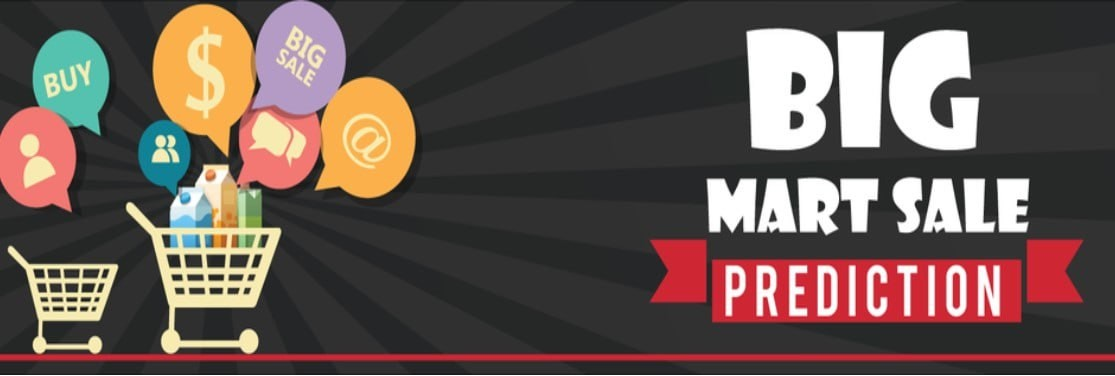

## Objective

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store (each row of data).

__So the idea is to find out the features (properties) of a product, and store which impacts the sales of a product.__

## Dataset Details

![](https://i.imgur.com/WlgNuFs.png)

## Get the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\dell\Downloads\Supermarket_sales_prediction (1).csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# EDA for BigMart Sales Data.

In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [6]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [10]:
df.Item_Type.value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [11]:
df.Outlet_Identifier.value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [12]:
df.Outlet_Size.value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [13]:
df.Outlet_Location_Type.value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [14]:
df.Outlet_Type.value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [15]:
df.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99]).style.background_gradient()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
1%,5.150000,0.000000,35.062752,1985.000000,83.890800
2%,5.440000,0.000000,37.219000,1985.000000,115.476352
3%,5.655000,0.000000,38.750600,1985.000000,145.583828
4%,5.820000,0.000000,40.466096,1985.000000,169.699104
5%,5.945000,0.000000,42.516700,1985.000000,188.421400
25%,8.773750,0.026989,93.826500,1987.000000,834.247400


### Showing count plot of Items that contain fats type :-

In [16]:
import warnings
warnings.filterwarnings("ignore")

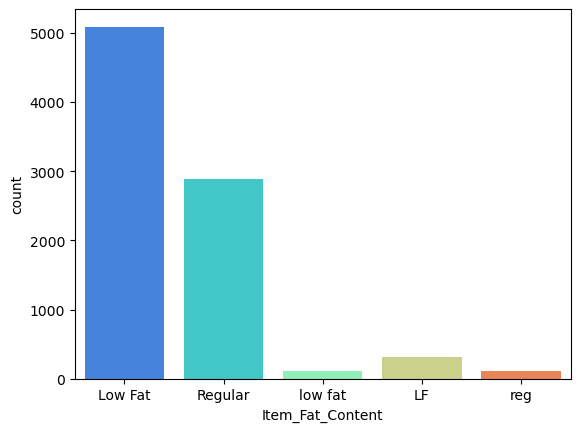

In [17]:
sns.countplot(data=df,x='Item_Fat_Content',palette="rainbow");

### Violin plot between 'Item_Fat_Content' and 'Item_Outlet_Sales'.
By examining the violin plot, one can gain insights into the distribution of sales amounts for different categories of fat content items, such as the range of sales, the central tendency of sales, and the presence of any outliers. This can help in understanding the relationship between the fat content of items and their sales performance in the outlet.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


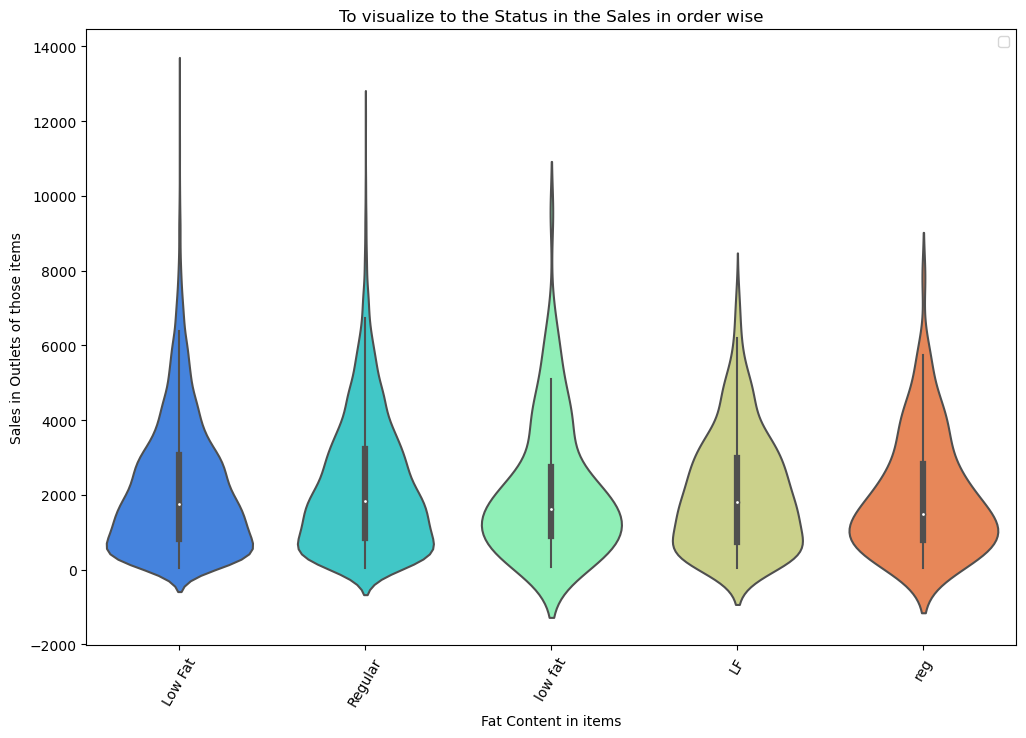

In [18]:
plt.figure(figsize=(12,8)) 
sns.violinplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales',palette="rainbow")
plt.xlabel('Fat Content in items')
plt.ylabel('Sales in Outlets of those items')
plt.xticks(rotation=60)
plt.title("To visualize to the Status in the Sales in order wise") 
plt.legend()
plt.show();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


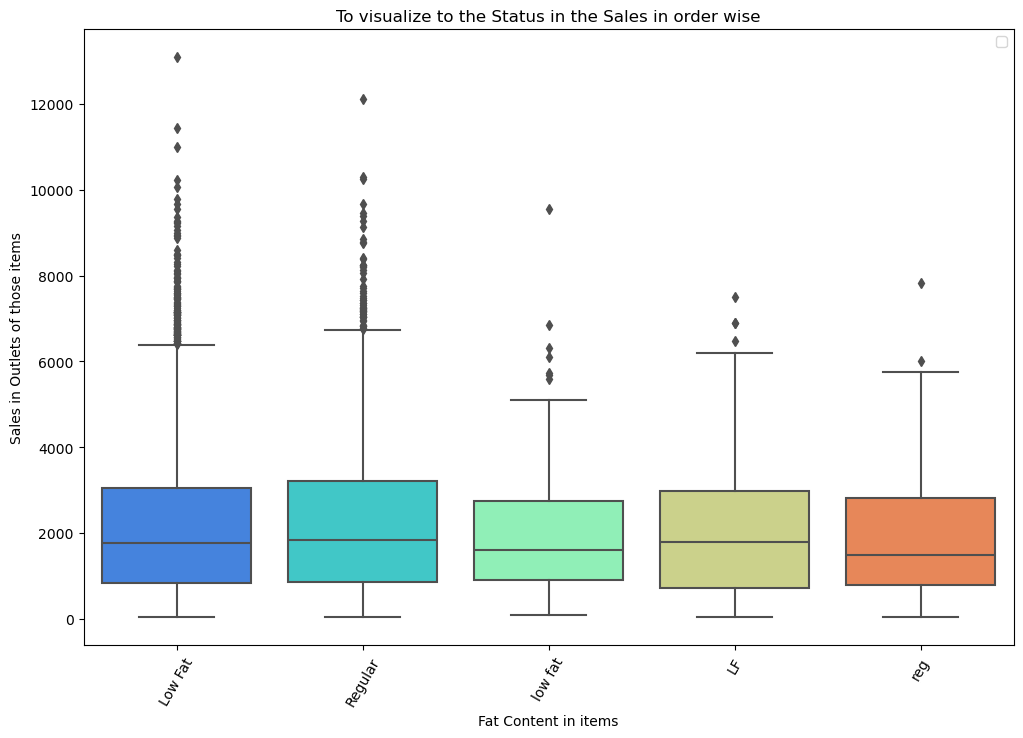

In [19]:
plt.figure(figsize=(12,8)) 
sns.boxplot(data=df,x='Item_Fat_Content',y='Item_Outlet_Sales',palette="rainbow")
plt.xlabel('Fat Content in items')
plt.ylabel('Sales in Outlets of those items')
plt.xticks(rotation=60)
plt.title("To visualize to the Status in the Sales in order wise") 
plt.legend()
plt.show();

In [20]:
fat_cont = {'low fat':'Low Fat',
                     'LF':'Low Fat',
                     'reg':'Regular',
                     'Low Fat':'Low Fat',
                    'Regular':'Regular'}

df["Item_Fat_Content"] = df["Item_Fat_Content"].map(fat_cont)

In [21]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [22]:
for i in df["Item_Visibility"]:
    print(i)

0.016047301
0.019278216
0.016760075
0.0
0.0
0.0
0.012741089
0.127469857
0.016687114
0.09444959
0.0
0.045463773
0.1000135
0.047257328
0.0680243
0.069088961
0.008596051
0.069196376
0.034237682
0.10249212
0.138190277
0.035399923
0.025698134
0.057556998
0.025896485
0.099887103
0.066693437
0.019356132
0.161466534
0.072221801
0.170348551
0.080829372
0.0
0.0
0.097904029
0.089291137
0.059511812
0.113123893
0.123111453
0.026480954
0.102511504
0.02681843
0.117818348
0.069102831
0.042277867
0.089498926
0.0
0.025879577
0.121632721
0.255394896
0.067779712
0.159803853
0.028696932
0.065041581
0.028760013
0.010053105
0.048157338
0.071958197
0.173481304
0.061082177
0.0
0.040071131
0.012090074
0.15028599
0.026015519
0.195068226
0.033082215
0.078946455
0.041700756
0.143422643
0.105296072
0.121531501
0.0
0.011324862
0.186357148
0.024205661
0.033230816
0.113720344
0.112556507
0.0
0.059352241
0.014087057
0.045230944
0.293417759
0.031382044
0.12639886
0.025403898
0.039057677
0.123115764
0.039624006
0.0404211

In [23]:
df[df.Item_Visibility == 0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,NaN,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200,Low Fat,0.0,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680


In [24]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
df["Item_Visibility"] = df["Item_Visibility"].replace(0,np.nan)

In [26]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [27]:
df["Item_Visibility"].max()

0.328390948

### Bar plot between 'Item_Fat_Content' and 'Item_Visibility'
By examining the bar plot, one can easily compare the Item_Visibility values across different categories of Item_Fat_Content and identify any differences or trends. This can provide insights into how the fat content of items may affect their visibility or display in a store, which can be useful for understanding consumer behavior and making business decisions.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


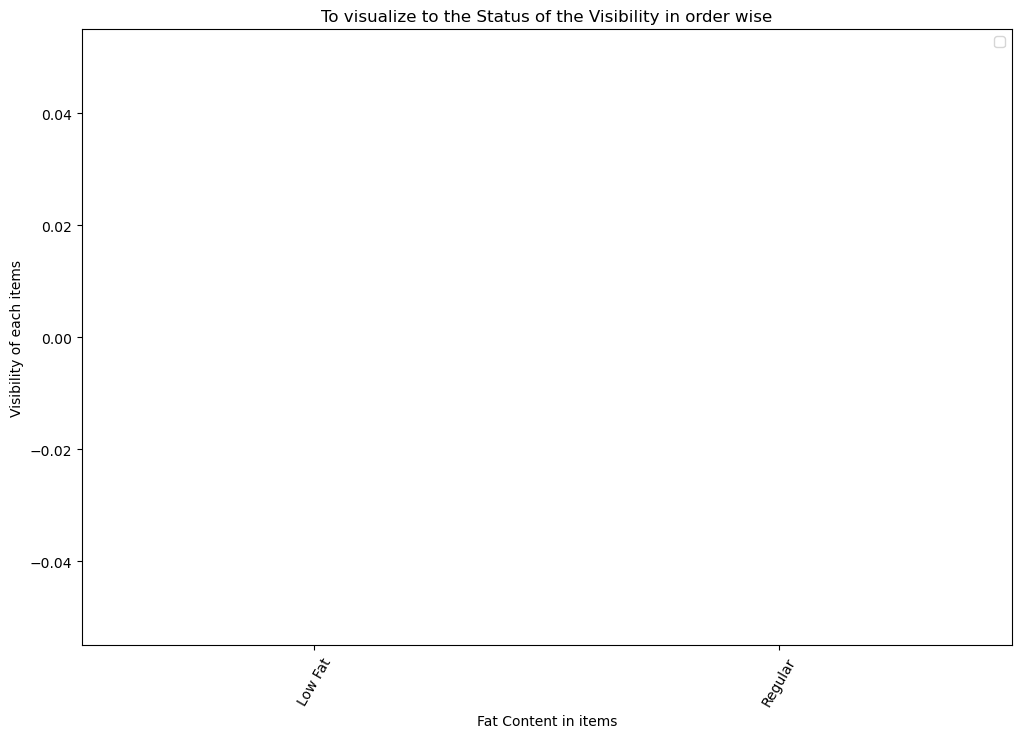

In [28]:
plt.figure(figsize=(12,8)) 
sns.barplot(data=df,x='Item_Fat_Content',y='Item_Visibility',palette="rainbow",estimator=np.median)
plt.xlabel('Fat Content in items')
plt.ylabel('Visibility of each items')
plt.xticks(rotation=60)
plt.title("To visualize to the Status of the Visibility in order wise") 
plt.legend()
plt.show()

In [29]:
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

# Pie plot 
By examining the pie plot, one can easily understand the distribution of items across different categories in terms of proportions or percentages. This can provide insights into the popularity or sales performance of different types of items in the store, which can be useful for product management, inventory planning, and marketing strategies.

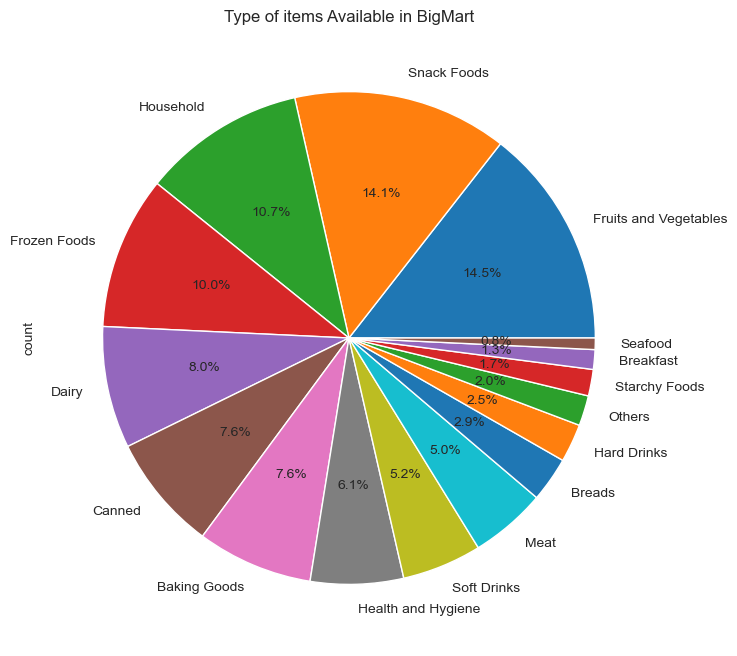

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(12,8))
df['Item_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Type of items Available in BigMart')
plt.show()

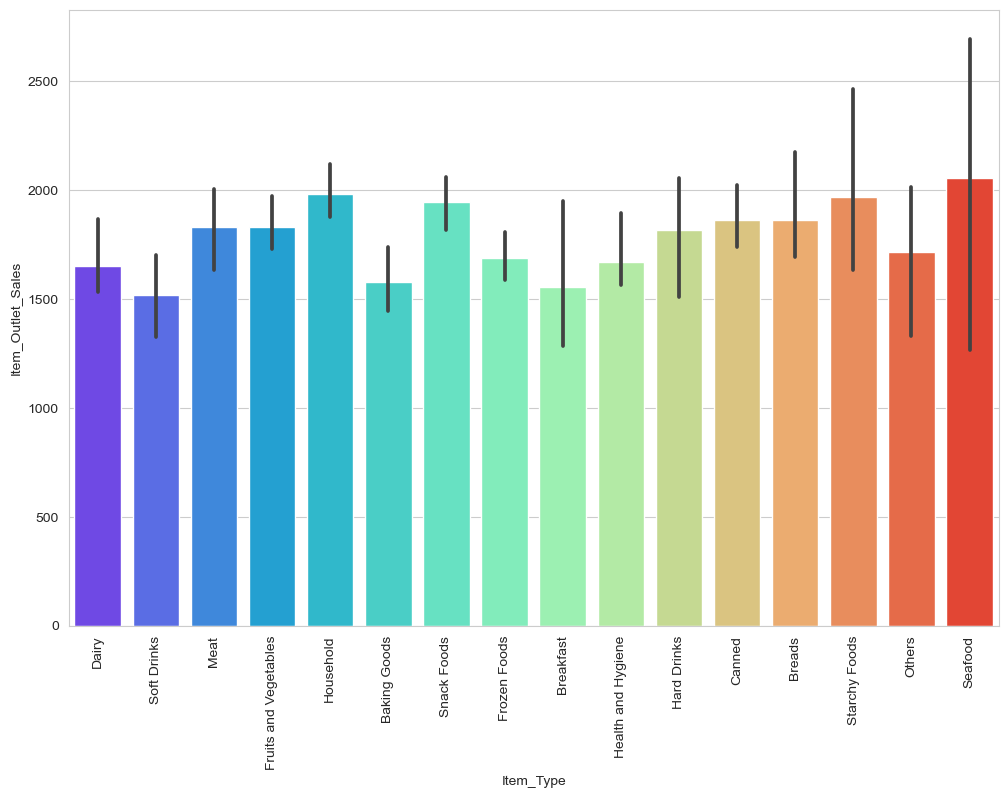

In [31]:
plt.figure(figsize=(12,8)) 
sns.barplot(data=df,x='Item_Type',y='Item_Outlet_Sales',palette="rainbow",estimator=np.median)
plt.xticks(rotation = 90);

In [32]:
df['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


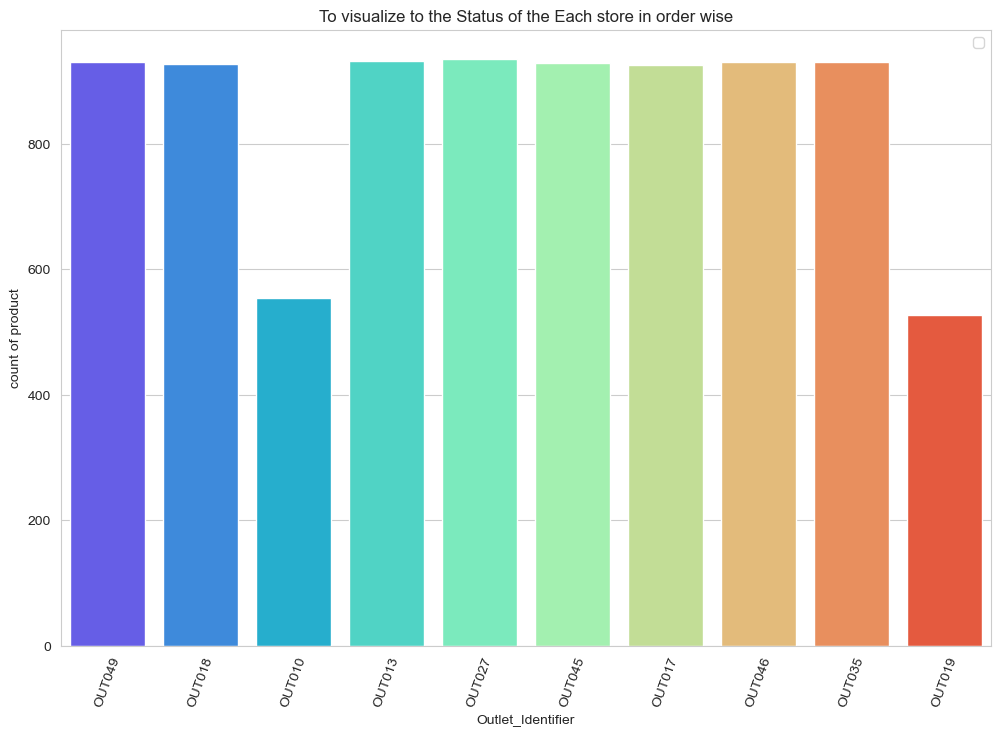

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Outlet_Identifier',palette="rainbow")
plt.xlabel('Outlet_Identifier')
plt.ylabel('count of product')
plt.xticks(rotation=70)
plt.title("To visualize to the Status of the Each store in order wise") 
plt.legend()
plt.show()

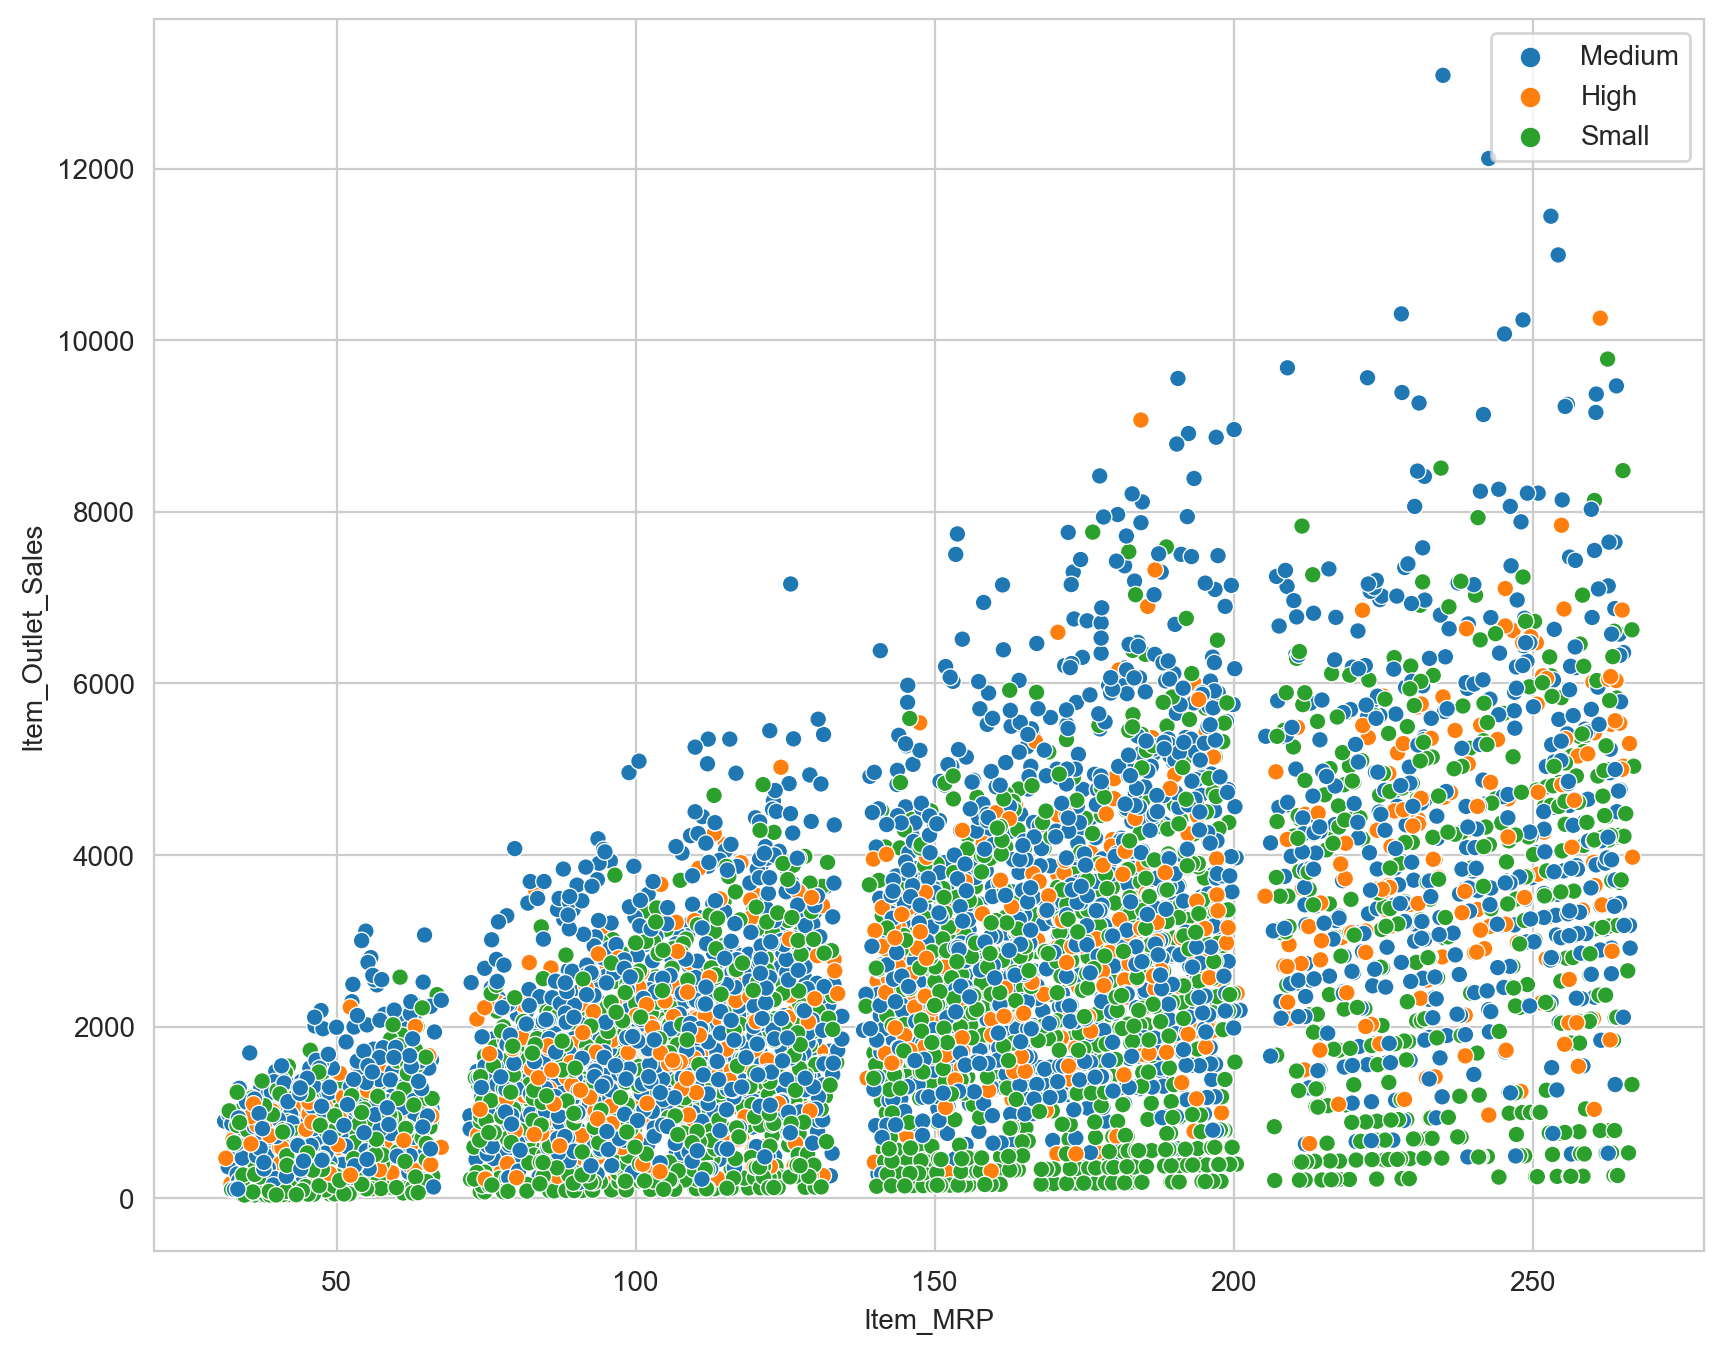

In [34]:
plt.figure(figsize=(10,8),dpi=200)
sns.scatterplot(data=df,x='Item_MRP',y='Item_Outlet_Sales',hue="Outlet_Size")
plt.legend()
plt.show()

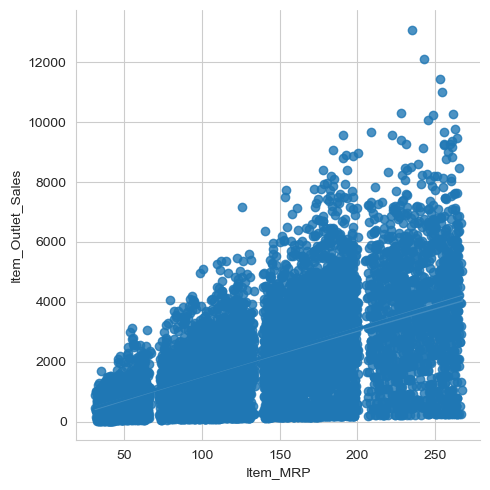

In [35]:
sns.lmplot(data = df,x="Item_MRP",y="Item_Outlet_Sales")

## Missing value Treatment

In [36]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               6.171536
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [37]:
df['Outlet_Size'].value_counts(normalize=True)*100

Outlet_Size
Medium    45.689514
Small     39.064289
High      15.246197
Name: proportion, dtype: float64

In [38]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In the given situation where "NaN" (Not a Number) values are encountered in a list of unique categories, such as "Medium", "High", "Small", and their corresponding value counts and percentages, there are several options to consider for replacing the "NaN" values:

Replace with the mode: We can replace the "NaN" values with the mode, which is the category that appears most frequently in the dataset. In this case, we would replace the "NaN" values with the category "Medium", as it has the highest count (2793) and percentage (45.69%) among the available categories.

In [39]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [40]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility               526
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [41]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.distplot(data[x])
    plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

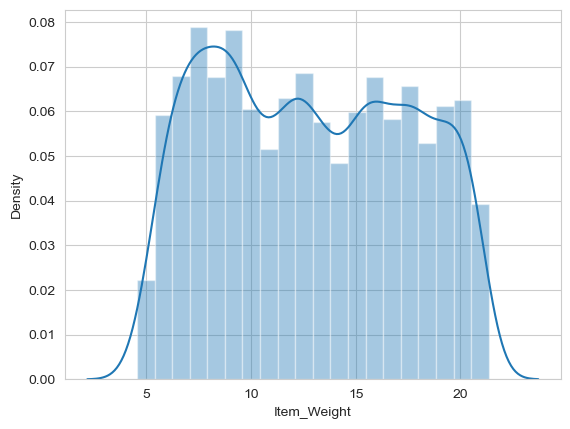

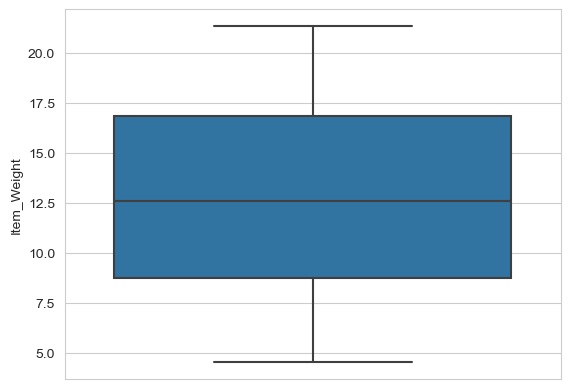

{'missing': 1463,
 'min': 4.55,
 'max': 21.35,
 'mean': 12.86,
 'var': 21.56,
 'std': 4.64,
 'range': 16.8,
 'q1': 8.77,
 'q2': 12.6,
 'q3': 16.85,
 'skewness': 0.08,
 'kurtosis': -1.23}

In [42]:
univariate_num(data=df,x='Item_Weight')

In [43]:
df['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [44]:
mode=df['Item_Weight'].mode()[0]
mode

12.15

In the given situation where a dictionary contains statistical summary values, and one of the values is "NaN" (Not a Number), you may consider the following options for replacing the "NaN" value:

Use data imputation techniques: Depending on the nature and characteristics of your data, you may consider using data imputation techniques, such as mean imputation, median imputation, or regression imputation, to estimate and fill in the missing value based on the values of other variables or statistical properties of the data. For example, you could impute the missing value with the mean, median, or mode of the available data.

In [45]:
df['Item_Weight'].fillna(mode,inplace=True)

In [46]:
df.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

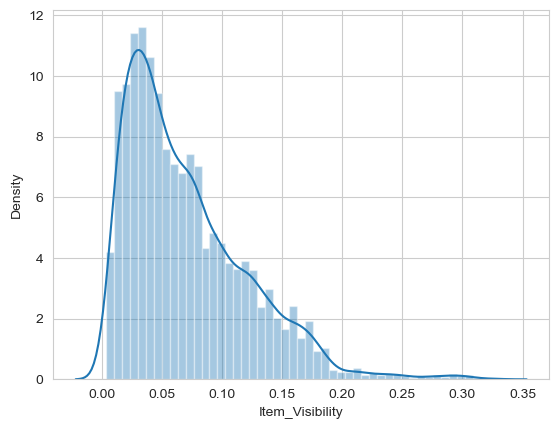

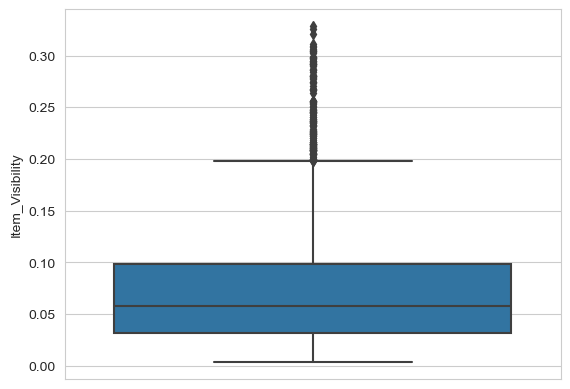

{'missing': 526,
 'min': 0.0,
 'max': 0.33,
 'mean': 0.07,
 'var': 0.0,
 'std': 0.05,
 'range': 0.33,
 'q1': 0.03,
 'q2': 0.06,
 'q3': 0.1,
 'skewness': 1.23,
 'kurtosis': 1.85}

In [47]:
univariate_num(data=df,x='Item_Visibility')

In [48]:
df['Item_Visibility'].min()

0.003574698

In [49]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

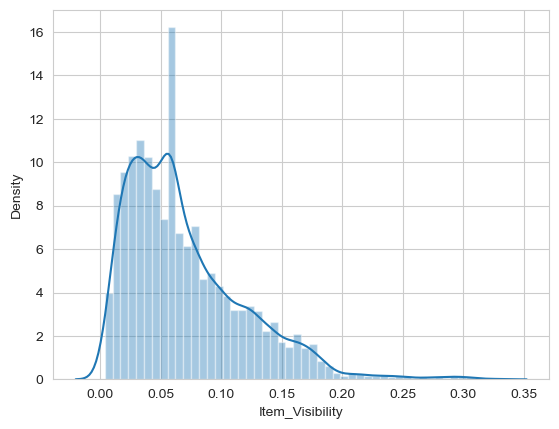

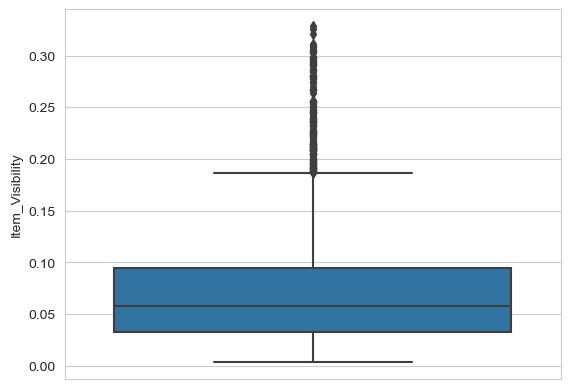

{'missing': 0,
 'min': 0.0,
 'max': 0.33,
 'mean': 0.07,
 'var': 0.0,
 'std': 0.05,
 'range': 0.33,
 'q1': 0.03,
 'q2': 0.06,
 'q3': 0.09,
 'skewness': 1.31,
 'kurtosis': 2.21}

In [50]:
univariate_num(data=df,x='Item_Visibility')

In the given situation where a dictionary contains statistical summary values, and one of the values is "NaN" (Not a Number), you may consider the following options for replacing the "NaN" value:

Use data imputation techniques: Depending on the nature and characteristics of your data, you may consider using data imputation techniques, such as mean imputation, median imputation, or regression imputation, to estimate and fill in the missing value based on the values of other variables or statistical properties of the data. For example, you could impute the missing value with the mean, median, or mode of the available data.

In [51]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Univariate outlier Treatment

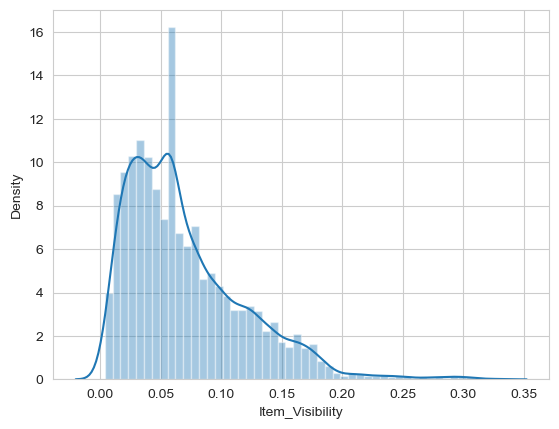

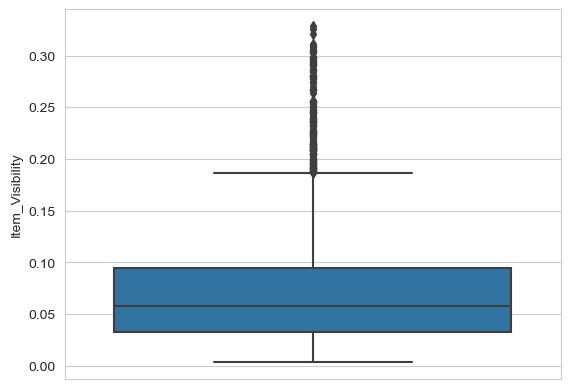

{'missing': 0,
 'min': 0.0,
 'max': 0.33,
 'mean': 0.07,
 'var': 0.0,
 'std': 0.05,
 'range': 0.33,
 'q1': 0.03,
 'q2': 0.06,
 'q3': 0.09,
 'skewness': 1.31,
 'kurtosis': 2.21}

In [52]:
univariate_num(data=df,x='Item_Visibility') 

We do not have any have any parametere to identify its outliers in others words visibility can be in any value of digits.

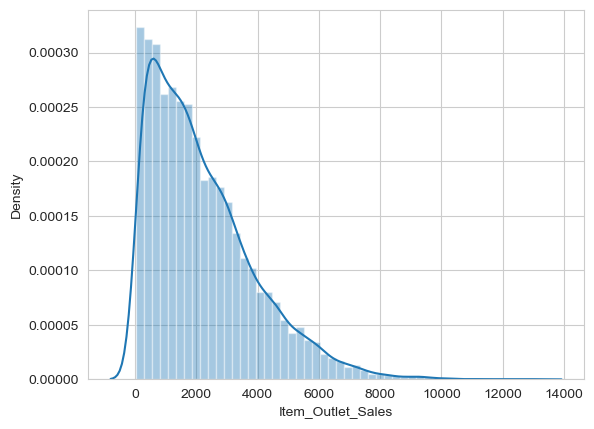

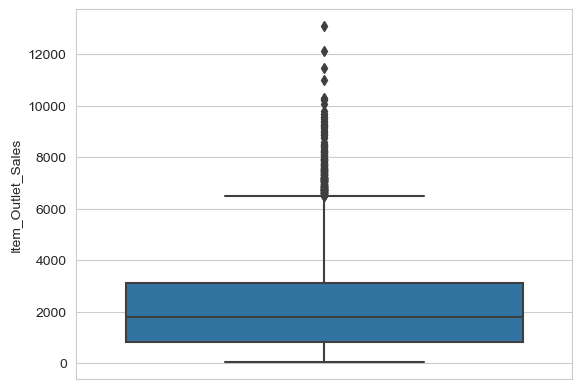

{'missing': 0,
 'min': 33.29,
 'max': 13086.96,
 'mean': 2181.29,
 'var': 2912140.94,
 'std': 1706.5,
 'range': 13053.67,
 'q1': 834.25,
 'q2': 1794.33,
 'q3': 3101.3,
 'skewness': 1.18,
 'kurtosis': 1.62}

In [53]:
univariate_num(data=df,x='Item_Outlet_Sales') 

It's important to note that the absence of outliers in a dataset does not necessarily mean that the data is error-free or that outliers do not exist in the underlying data. It's always crucial to carefully understand and analyze the data context, quality, and distribution characteristics to make informed conclusions about the presence or absence of outliers in a dataset.

In [54]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

# Preparing for model Asigning

In [55]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [56]:
df.drop(columns=['Item_Identifier'],inplace=True)

In [57]:
df.describe(percentiles=[0.01,0.02,.03,.04,.05,.25,.50,.90,.95,.96,.97,.98,.99]).style.background_gradient(cmap='Reds')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.736176,0.069699,140.992782,1997.831867,2181.288914
std,4.234540,0.048826,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
1%,5.175000,0.007351,35.062752,1985.000000,83.890800
2%,5.485000,0.009617,37.219000,1985.000000,115.476352
3%,5.780000,0.010913,38.750600,1985.000000,145.583828
4%,5.940000,0.012198,40.466096,1985.000000,169.699104
5%,6.130000,0.013486,42.516700,1985.000000,188.421400
25%,9.310000,0.033085,93.826500,1987.000000,834.247400


In [58]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [59]:
#Converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature Item_Fat_Content
mapping {'Low Fat': 0, 'Regular': 1}
Feature Item_Type
mapping {'Baking Goods': 0, 'Breads': 1, 'Breakfast': 2, 'Canned': 3, 'Dairy': 4, 'Frozen Foods': 5, 'Fruits and Vegetables': 6, 'Hard Drinks': 7, 'Health and Hygiene': 8, 'Household': 9, 'Meat': 10, 'Others': 11, 'Seafood': 12, 'Snack Foods': 13, 'Soft Drinks': 14, 'Starchy Foods': 15}
Feature Outlet_Identifier
mapping {'OUT010': 0, 'OUT013': 1, 'OUT017': 2, 'OUT018': 3, 'OUT019': 4, 'OUT027': 5, 'OUT035': 6, 'OUT045': 7, 'OUT046': 8, 'OUT049': 9}
Feature Outlet_Size
mapping {'High': 0, 'Medium': 1, 'Small': 2}
Feature Outlet_Location_Type
mapping {'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2}
Feature Outlet_Type
mapping {'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2': 2, 'Supermarket Type3': 3}


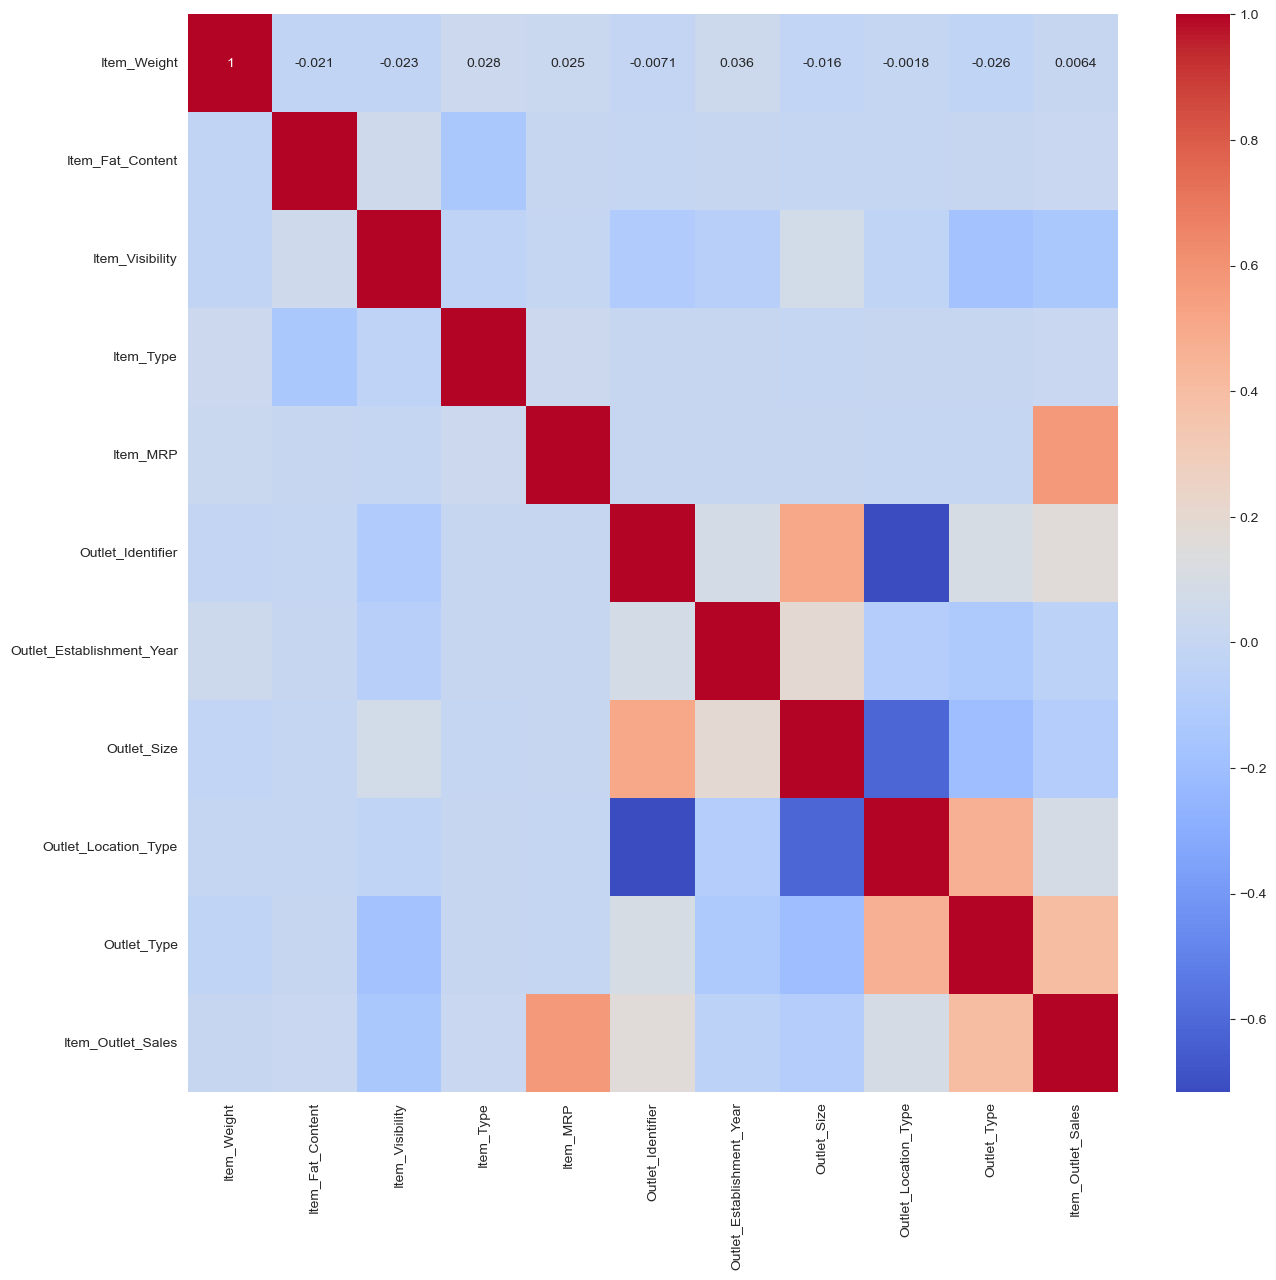

In [60]:
plt.figure(figsize=(15,14))
cr=df.corr()
sns.heatmap(cr,cmap='coolwarm',annot=True)
plt.show()

The correlation matrix for the Bigmart dataset would typically be a square matrix where the rows and columns represent the variables in the dataset, and the cells contain the correlation coefficients. The correlation coefficient is a value that ranges from -1 to 1, with 1 indicating a perfect positive linear relationship, -1 indicating a perfect negative linear relationship, and 0 indicating no linear relationship between the variables.

In [61]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.057792,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.057792,9,53.8614,1,1987,0,2,1,994.7052


In [62]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

# Modeling with ML algorithums.

In [63]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,19.20,1,0.057792,6,182.0950,0,1998,1,2,0,732.3800
4,8.93,0,0.057792,9,53.8614,1,1987,0,2,1,994.7052


In [64]:
y=df['Item_Outlet_Sales']
x=df.drop(columns=['Item_Outlet_Sales'])

In [65]:
x.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [68]:
x_train.shape

(6392, 10)

In [69]:
x_test.shape

(2131, 10)

# Assigning Linear Regression Model

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [71]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [73]:
r2 = r2_score(y_test,  y_test_pred)

# Calculate mean squared error (MSE) as a measure of accuracy
mse = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error (RMSE) as a measure of accuracy
rmse = np.sqrt(mse)

# Calculate mean absolute error (MAE) as a measure of accuracy
mae = mean_absolute_error(y_test, y_test_pred)

# Print the accuracy metrics
print("R2 Score:", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R2 Score: 0.49345909785131536
Mean Squared Error (MSE): 1452165.7443151297
Root Mean Squared Error (RMSE): 1205.0583987156513
Mean Absolute Error (MAE): 906.9941427179476


In [74]:
print("Training:",lr.score(x_train,y_train))  # Training Score
print("Testing:",lr.score(x_test,y_test))

Training: 0.5156523717042178
Testing: 0.49345909785131536


# Assigning Decision Tree regression Model

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [76]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.12556015514181917
Mean Squared Error: 2506868.809173783
Root Mean Squared Error: 1583.3094483308632


In [77]:
model.score(x_train,y_train)

1.0

# Assigning Random Forest Regressor Model

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [79]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Calculate accuracy
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.55228129305534
Mean Squared Error: 1283532.6161346352
Root Mean Squared Error: 1132.9309847182374


In [80]:
model.score(x_train,y_train)

0.937835686472168

In [81]:
y_train_pred = model.predict(x_train)

In [82]:
new_pred = model.predict(x)

In [83]:
df["Predicted Sales"] = new_pred

In [84]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predicted Sales
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,4198.002160
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,555.237252
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,2197.532822
3,19.200,1,0.057792,6,182.0950,0,1998,1,2,0,732.3800,685.134832
4,8.930,0,0.057792,9,53.8614,1,1987,0,2,1,994.7052,897.984434
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,2888.659854
8519,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,2333.562420
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,1212.002346
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1547.445702


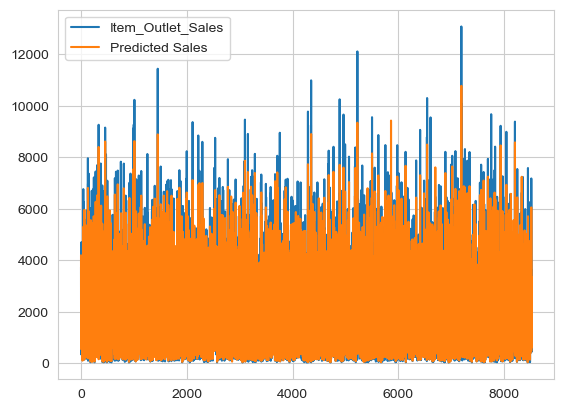

In [85]:
df["Item_Outlet_Sales"].plot()
df["Predicted Sales"].plot()
plt.legend()
plt.show()

In [86]:
df["Residual"] = df["Item_Outlet_Sales"] - df["Predicted Sales"]
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predicted Sales,Residual
0,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,4198.002160,-462.864160
1,5.920,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,555.237252,-111.814452
2,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,2197.532822,-100.262822
3,19.200,1,0.057792,6,182.0950,0,1998,1,2,0,732.3800,685.134832,47.245168
4,8.930,0,0.057792,9,53.8614,1,1987,0,2,1,994.7052,897.984434,96.720766
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,2888.659854,-110.276454
8519,8.380,1,0.046982,0,108.1570,7,2002,1,1,1,549.2850,2333.562420,-1784.277420
8520,10.600,0,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,1212.002346,-18.888746
8521,7.210,1,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1547.445702,298.151898
